# Introduction

Le débrouillage d'images est un problème ancien dans le domaine du traitement d'images, qui continue à attirer l'attention des chercheurs et des professionnels. Il a des applications dans de nombreux problèmes réels différents et sert à visualiser facilement un grand nombre de problèmes inverses dans de nombreux domaines. Le débrouillage d'images cherche à prendre une image floue et à la restaurer à sa forme originale de manière algorithmique. Lors du débrouillage d'images, une description mathématique de la façon dont l'image a été brouillée est très importante pour maximiser son efficacité. Dans le cas des images prises dans le monde réel, nous n'avons pas la possibilité de connaître la fonction mathématique par laquelle l'image a été floutée. Cependant, il existe des méthodes permettant d'estimer la façon dont le flou s'est produit.

Dans ce rapport, nous essayons d'améliorer notre compréhension des techniques et des limites des technologies de débrouillage des images, et d'explorer leur efficacité dans des cas simples et contrôlés. Dans la section suivante, nous présenterons quelques généralités sur le débrouillage d'images et les techniques associées. Ensuite, nous discuterons des résultats obtenus, ainsi que de certaines des faiblesses et des limites de l'étude.

# Cadre théorique
Afin de mieux comprendre les méthodes de débrouillage d'images appliquées dans le cadre de ce projet, nous avons effectué des recherches sur le mécanisme qui se cache derrière les approches naïves du débourrage d'images. Dans le reste de ce rapport, sauf indication contraire, toutes les images sont supposées être en niveaux de gris.

## Equation de la chaleur

L'équation de la chaleur modélise la façon dont la température change avec le temps.
Mathématiquement, nous pouvons écrire l'équation en n dimensions comme une équation aux dérivées partielles (EDP). Pour $x$ dans un domaine $D \subset \mathbb{R}^n$,

$$\frac{\partial}{\partial t}  u(x,t) = \Delta u(x,t)$$

La valeur initiale du problème est de trouver $u$ étant donné une distribution de température donnée à $t=0$ : $u(x,0) = f(x)$.

Dans notre cas, $D$ sera la matrice de pixels $L \times W$ de notre image. Notre image est représentée par la fonction $f(x)$, ou l'intensité à chaque pixel. Ici, on considére que $x=(x_1,x_2) \in \mathbb{R}^2$ et typiquement $x\in[0,255]^2$ pour les images RVB. Cependant, nous allons travailler avec des images en niveaux de gris. Pour appliquer l'équation de la chaleur à une image, nous allons résoudre la valeur de l'équation de la chaleur au temps $T$ étant donné la condition initiale que la distribution de la température est égale à l'intensité de l'image. Numériquement, deux éléments sont nécessaires pour résoudre l'équation de la chaleur : Nous devons discrétiser l'opérateur Laplacien. Ainsi, nous devons résoudre l'EDP en temps par la méthode d'Euler.

### Discrétisation de l'opérateur Laplacien
La dérivée d'une fonction de classe $\mathcal{C}^1$ est définie dans une dimension par :

$$ f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}$$

Pour calculer cela sur ordinateur, il existe de nombreux schémas de "différences finies". En général, un schéma est choisi parce qu'il améliore la convergence du calcul. Par exemple, la différence centrale est donnée par :

$$ f'(x) \approx \frac{f(x+\frac{1}{2} h) - f(x-\frac{1}{2} h)}{h}$$

Ce qui est plus rapide que le calcul naïf de la dérivée qui est seulement O(h). Le Laplacien dans le cas de conditions aux limites de Neumann est donné par la formule suivante de différence finie en deux dimensions :

Pour $x, y, h \in \mathbb{R}$,
$$\Delta f(x,y) \approx \frac{f(x-h,y) + f(x+h,y) + f(x,y+h) + f(x,y-h)}{h^2}$$

On obtient la même formule que celle vue en cours. Dans notre cas, $h=1$ est suffisant.

### La méthode d'Euler
La méthode d'Euler est une méthode pour résoudre les ODE. Si nous fixons un $(x,y) \in \mathbb{R}^2$ dans l'équation $\partial_t u(x, y,t) = \Delta_{(x,y)} u(x,y,t)$, alors cette équation peut être vue comme une ODE. En procèdent par la meme façon pour chaque $x$ et par résolvant l'équation jusqu'au temps $T$, alors on a une solution pour $u(x,T)$.

La méthode d'Euler est définie par :

$$ \frac{\,d}{\,dt} u(t) = f(t) $$

La variation temporelle est donnée par $u (t+\,dt) = u (t) + \,dt \cdot f(t)$. Cette méthode peut être itérée et résolue pour une durée quelconque. Bien sûr, on peut augmenter le nomrbre d'itérations pour plus de précision. Nous ignorerons la question de la convergence et dirons simplement que vous choisissez un petit $\,dt$ pour que la solution numérique approximative soit proche de la solution réelle.
## Equation de Perona-Malik
L'équation de diffusion de Perona-Malik est en quelque sorte une généralisation de l'équation de diffusion vue juste avant. 

Elle peut être présentée formellement comme suit :

$$\frac{\partial}{\partial t}  u(x,t) = \mathrm{div} \left(c(\|\nabla u\|_2) \cdot \nabla u\right)$$

Avec $c$ est le coéfficient de diffusion. La fonction contrôle le taux de diffusion et est généralement choisie en fonction du gradient de l'image de manière à préserver les bords de l'image [2].

Les chercheures : Pietro Perona et Jitendra Malik ont proposés cette fonction pour le coefficient de diffusion :

$$c (\| \nabla u \|) = \frac{1}{1+ \left( \frac{\|\nabla u\|}{\alpha} \right)^2}$$

## Modèle mathématique

Pour récupérer une image, on peut aussi procéder en minimisant la fonction $u \in\Omega\subset\mathbb{R}^2$. Le problème pourrait être formulé comme suit :

$$\min_{u} \int_{\Omega} \|\nabla u\|_2^2 + \lambda \int_{\Omega} \Phi (\|\nabla u\|_2)$$
Dont son minimum vérifie l'équation suivante :

$$u - \lambda \mathrm{div}\left( \frac{\Phi'(\|\nabla u\|_2)}{\|\nabla u\|_2} \nabla u \right) = u_0$$

Dans la partie qui suit, nous allons implémenter ce modèle sous Python, et on va travailler avec la fonction $\Phi(t) = t$.

# Programme et résultats
Les résultats présentés ci-dessous ont été obtenus dans un seul ensemble de conditions. Tous les fonctions d'étalement du point (PSF) ont été générés à l'aide d'un flou gaussien avec $\mu=0$ et $\sigma=1$, et toutes les images ont été manipulées dans les conditions limites de Neumann. En outre, les images utilisées sont toutes basées sur une image originale nette qui est floutée par une méthode donnée de sorte que la PSF du flou est connue. Maintenant que nous maîtrisons les principes de base, nous allons prendre une image et appliquer les équations vues avant.

Pour des raisons de simplicité, j'ai réécrit tous les codes Octave vus dans le cours en Python. Heureusement, cela ne m'a pas nécessité d'utiliser des bibliothèques sophistiquées, au contraire j'ai travaillé uniquement avec les bibliothèques NumPy et Matplotlib, que tout le monde connaît.

Nous allons commencer par importer les bibliothèques.

In [1]:
from matplotlib.pyplot import *
import numpy as np

IMAGE_DIR = "../data/imgs/lenna.jpg"

## Lecture et visualisation d'une image

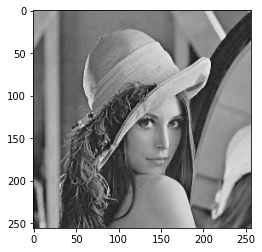

In [2]:
image = imread (IMAGE_DIR)

imshow(image, cmap = "gray")

## Ajout du bruit gaussien à une image

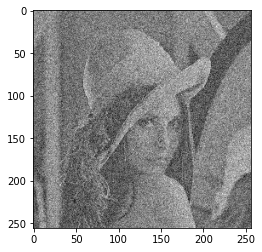

In [3]:
def gaussian_noise (I, noise = 50) :
    return I + noise * np.random.normal (0,1, np.shape (I))

imshow(gaussian_noise (image), cmap = 'gray')

## Condition aux limites de Neumann

Pour pouvoir utiliser la formule discrétisée sur les frontières vues dnas l'équation de la chaleur, nous devons la rembourrer avec une "symétrie de réflexion". Nous allons faire cela avec la bibliothèque NumPy :

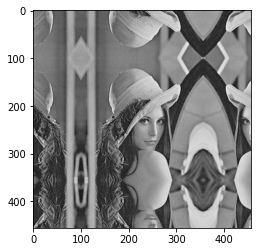

In [4]:
def neumann_bc (I, border_size = 100) :
    a, b = np.shape (I)
    
    d = border_size
    
    A = a + 2 * border_size
    B = b + 2 * border_size
    
    new_I = np.zeros ((A,B))
    
    new_I [d:(A-d) , d:(B-d)] = I
    
    for i in range (d,A-d) :
        for j in range (0,d) :
            new_I [i,j] = new_I [i, 2 * d - j]
            
        for j in range (0,d) :
            new_I [i,j+B-d] = new_I [i, B-d-1 - j]
    
    for j in range (0,B) :
        for i in range (0,d) :
            new_I [i,j] = new_I [2 * d - i, j]
            
        for i in range (0,d) :
            new_I [i+B-d,j] = new_I [B-d-1 - i, j]

    return new_I

imshow(neumann_bc (image), cmap = 'gray')

## Dérivées partielles

In [3]:
def compute_derivatives_1 (I) :
    a, b = np.shape (I)

    I = neumann_bc (I, d:=1)
    A, B = np.shape (I)
    
    I_x = np.zeros ((a,b))
    I_y = np.zeros ((a,b))
    for i in range (d, A-d) :
        for j in range (d, B-d) :
            I_x [i-d,j-d] = (I[i+1,j] - I[i-1,j]) / 2
            I_y [i-d,j-d] = (I[i,j+1] - I[i,j-1]) / 2
            
    return I_x, I_y

def compute_derivatives_2 (I) :
    a, b = np.shape (I)

    I = neumann_bc (I, d:=1)
    A, B = np.shape (I)
    
    I_xx = np.zeros ((a,b))
    I_xy = np.zeros ((a,b))
    I_yy = np.zeros ((a,b))
    
    for i in range (d, A-d) :
        for j in range (d, B-d) :
            I_xx [i-d,j-d] = (I[i+1,j] - 2 * I[i,j] + I[i,j-1])
            I_yy [i-d,j-d] = (I[i,j+1] - 2 * I[i,j] + I[i,j-1])

            I_xy [i-d,j-d] = (I[i+1,j+1] - I[i+1,j-1] - I[i-1,j+1] + I[i-1,j-1]) / 4
            
    return I_xx, I_yy, I_xy

## Equation de la chaleur

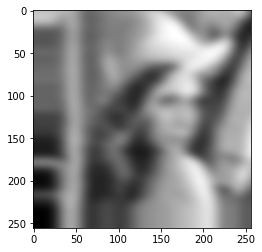

In [6]:
def heat_eq (I, dt = .25, N = 100, noise = 15) :
    I0 = gaussian_noise (I, noise)
    
    J = I0
    for i in range (N) :
        J_xx, J_yy, J_xy = compute_derivatives_2 (J)

        laplacien = J_xx + J_yy
        J += laplacien * dt
    return J

image_blurry = heat_eq (image)
imshow(image_blurry, cmap = 'gray')

## Equation de Perona-Malik

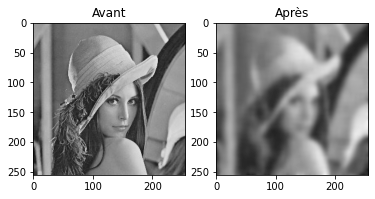

In [7]:
def perona_malik_eq (I, dt = .25, N = 100, noise = 35, alpha = 40) :
    I0 = gaussian_noise (I, noise)
    
    J = I0    
    for i in range (N) :
        norm = np.sqrt (sum (compute_derivatives_1(J)[0] ** 2, compute_derivatives_1(J)[1] ** 2))

        c1 = 1 / np.sqrt (1 + (norm / alpha)**2)

        px_x = compute_derivatives_1 (c1 * compute_derivatives_1(J) [0]) [0]
        py_y = compute_derivatives_1 (c1 * compute_derivatives_1(J) [1]) [1]

        divgrad = px_x + py_y

        J += divgrad * dt
    return J

image_blurry = perona_malik_eq (image)

fig = figure()

ax = fig.add_subplot(1, 2, 1)
ax.set_title('Avant')
imshow(image, cmap = 'gray')

ax = fig.add_subplot(1, 2, 2)
ax.set_title('Après')
imshow(image_blurry, cmap = 'gray')


## Modèle mathématique

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


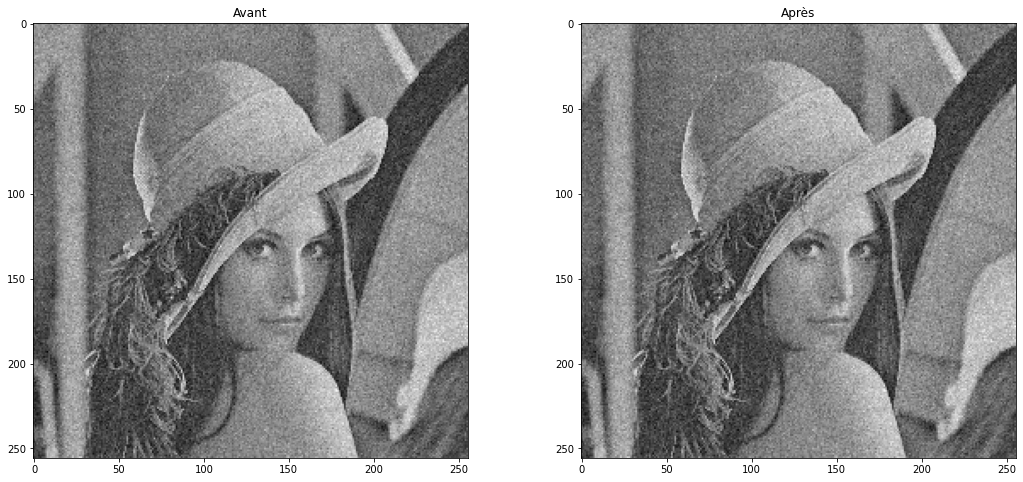

In [8]:
NOISE = 20

I0 = gaussian_noise (image, NOISE)

def modele_eq (I, dt = .25, noise = NOISE, ambda = 1, alpha = 40, N = 100) :
#     I0 = gaussian_noise (I, noise)

#     phi_prime_1 = lambda u : compute_derivatives_1 (np.sqrt (1+u**2))
    phi_prime_2 = lambda u : compute_derivatives_1 (1)
      
    for i in range (N) :
        norm = np.sqrt (sum (compute_derivatives_1(I)[0] ** 2, compute_derivatives_1(I)[1] ** 2))
        
        w = (I-I0) - ambda * ( (sum (compute_derivatives_1( I ))) / norm)
        
        I -= dt * w  
    
    print (w.astype(int))
    return I

image_blurry = modele_eq (I0 := gaussian_noise (image, NOISE))

fig = figure(figsize=(18,8))

ax = fig.add_subplot(1, 2, 1)
ax.set_title('Avant')
imshow(I0, cmap = 'gray')

ax = fig.add_subplot(1, 2, 2)
ax.set_title('Après')
imshow(image_blurry, cmap = 'gray')

Comme la théorie l'indique, nous pouvons voir que $w$ converge vers $0$.

# Conclusion

Les avancées dans le domaine du débruitage des images et autres techniques similaires sont importantes tant pour le développement de la photographie moderne que pour la restauration d'images et de vidéos dont la précision n'est pas optimale. La capacité à éliminer le bruit des images capturées dans l'astronomie et la médecine est d'une importance cruciale pour permettre aux professionnels concernés de remplir leur mission de la manière la plus efficace possible. 

Malgré le fait que notre travail se soit limité à certaines des méthodes de débourrage les plus basiques et les moins bien conditionnées, les résultats démontrent l'intérêt des techniques de débourrage d'images et de l'étude de méthodes plus sophistiquées. Grâce à ce projet, nous avons pu mieux comprendre à la fois la réalisation et les concepts qui se cachent derrière la façon dont les images sont traitées dans le processus de débourrage.

# Références

1. El Rhabi Mohammed, "Introduction to image processing" (2022).
1. "Anisotropic diffusion", Wikipedia. 13 juillet 2021. Consulté le: 16 février 2022. [En ligne]. Disponible sur: https://en.wikipedia.org/w/index.php?title=Anisotropic_diffusion